In [1]:
import numpy as np
import matplotlib.pyplot as plt
import histlite as hl

import sys
sys.path.append('/p/lustre1/yu47/Sterile_Neutrino/sensitivity/')

from fitter import fitter
from detector import detector
from neutrino_source import neutrino_source

In [2]:
source = neutrino_source('Cr51', 1e5, [0.75], [0.9])
det = detector('nEXO')

det.position = (0, 0, 0)
dist = 0.1 # unit: m
source.position = (0, 0, -det.height/2-dist)

#det.baseline = np.sqrt((source.position[0]-det.position[0])**2 + (source.position[1]-det.position[1])**2 + (source.position[2]-det.position[2])**2 )
det.run_time = 100 # days

dm2 = 1 # unit: eV
sin2theta_square = 0.1

fit = fitter(source, det)

A Cr51 hot neutrino source with nominal 100000.0 in xx years with neutrino energies [0.75] and branch ratios [0.9] is created.


In [4]:
from tqdm.notebook import tqdm
PDFs = []
names = []
for sin in tqdm(np.logspace(-2, 1, 20), desc="Loop sin2theta_square..."):
    for dm2 in tqdm(np.logspace(-2, 1, 20), desc="Loop delta_m2..."):
        h = fit.generate_PDF(dm2, sin, 0.75)
        PDFs.append(h)
        name = f'dm2_{dm2:.2f}_sin2theta_square_{sin:.2f}'
        names.append(name)

Loop sin2theta_square...:   0%|          | 0/20 [00:00<?, ?it/s]

Loop delta_m2...:   0%|          | 0/20 [00:00<?, ?it/s]

Loop delta_m2...:   0%|          | 0/20 [00:00<?, ?it/s]

Loop delta_m2...:   0%|          | 0/20 [00:00<?, ?it/s]

Loop delta_m2...:   0%|          | 0/20 [00:00<?, ?it/s]

Loop delta_m2...:   0%|          | 0/20 [00:00<?, ?it/s]

Loop delta_m2...:   0%|          | 0/20 [00:00<?, ?it/s]

Loop delta_m2...:   0%|          | 0/20 [00:00<?, ?it/s]

Loop delta_m2...:   0%|          | 0/20 [00:00<?, ?it/s]

Loop delta_m2...:   0%|          | 0/20 [00:00<?, ?it/s]

Loop delta_m2...:   0%|          | 0/20 [00:00<?, ?it/s]

Loop delta_m2...:   0%|          | 0/20 [00:00<?, ?it/s]

Loop delta_m2...:   0%|          | 0/20 [00:00<?, ?it/s]

Loop delta_m2...:   0%|          | 0/20 [00:00<?, ?it/s]

Loop delta_m2...:   0%|          | 0/20 [00:00<?, ?it/s]

Loop delta_m2...:   0%|          | 0/20 [00:00<?, ?it/s]

Loop delta_m2...:   0%|          | 0/20 [00:00<?, ?it/s]

Loop delta_m2...:   0%|          | 0/20 [00:00<?, ?it/s]

Loop delta_m2...:   0%|          | 0/20 [00:00<?, ?it/s]

Loop delta_m2...:   0%|          | 0/20 [00:00<?, ?it/s]

Loop delta_m2...:   0%|          | 0/20 [00:00<?, ?it/s]

In [5]:
dd = {}
for name, pdf in zip(names, PDFs):
    dd[name] = pdf
    
print(dd)

{'dm2_0.01_sin2theta_square_0.01': Hist(40 bins in [0.09999999999999998,1.283], with sum 33.8123415046492, 0 empty bins, and 0 non-finite values), 'dm2_0.04_sin2theta_square_0.01': Hist(40 bins in [0.09999999999999998,1.283], with sum 33.8123415046492, 0 empty bins, and 0 non-finite values), 'dm2_0.18_sin2theta_square_0.01': Hist(40 bins in [0.09999999999999998,1.283], with sum 33.8123415046492, 0 empty bins, and 0 non-finite values), 'dm2_0.78_sin2theta_square_0.01': Hist(40 bins in [0.09999999999999998,1.283], with sum 33.8123415046492, 0 empty bins, and 0 non-finite values), 'dm2_3.36_sin2theta_square_0.01': Hist(40 bins in [0.09999999999999998,1.283], with sum 33.812341504649204, 0 empty bins, and 0 non-finite values), 'dm2_14.38_sin2theta_square_0.01': Hist(40 bins in [0.09999999999999998,1.283], with sum 33.8123415046492, 0 empty bins, and 0 non-finite values), 'dm2_61.58_sin2theta_square_0.01': Hist(40 bins in [0.09999999999999998,1.283], with sum 33.812341504649204, 0 empty bin

In [13]:
fit.write_PDFs_intoFile(PDFs, pdffile)

In [3]:
pdffile = '../../jobs/PDFs/dm21.0_sin2thetasquare0.1_Ev750keV_dist10cm_3cmbin.p'
hs = fit.load_PDFs_fromFile(pdffile)

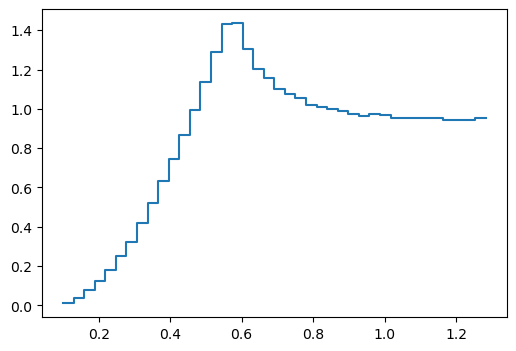

In [5]:
fig, ax = plt.subplots(figsize=(6, 4))
hl.plot1d(ax, hs)